* Cho dữ liệu penbased-5an-nn.csv
* Yêu cầu 1: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực  hiện việc xác định một mẫu là loại (class) nào (trong các loại 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) dựa trên các thông tin được cung cấp.
1. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp? 
2. Đánh giá model dựa trên train/test.
3. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả.
* Yêu cầu 2: Hãy áp dụng thuật toán PCA và thuật toán đã chọn ở Yêu cầu 1 để thực hiện việc xác định một mẫu là loại (class) nào (trong các loại 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) dựa trên các thông tin được cung cấp. Nhận xét kết quả giữa việc có áp dụng PCA và không áp dụng PCA.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
cols = ['At1', 'At2', 'At3', 'At4', 'At5', 'At6', 'At7', 'At8',
        'At9', 'At10','At11', 'At12', 'At13', 'At14', 'At15', 'At16', 'Class']
df = pd.read_csv('../../Data/penbased-5an-nn.csv', header=None, names=cols)

In [3]:
df.head()

,At1,At2,At3,At4,At5,At6,At7,At8,At9,At10,At11,At12,At13,At14,At15,At16,Class
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


In [4]:
df.describe()

,At1,At2,At3,At4,At5,At6,At7,At8,At9,At10,At11,At12,At13,At14,At15,At16,Class
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,39.505277,83.219159,41.046488,82.074509,49.764374,64.793031,51.261372,44.677584,56.449236,34.557041,60.086881,35.706423,54.602074,35.654021,47.381823,29.784934,4.431587
std,34.185374,19.044205,26.651870,21.033427,33.839527,27.323795,30.513046,29.884245,33.933970,27.598896,36.953507,27.481161,22.819585,33.126822,41.267376,35.721699,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,75.000000,20.000000,70.000000,18.000000,48.000000,28.000000,23.000000,28.000000,8.000000,24.000000,12.000000,41.000000,6.000000,0.000000,0.000000,2.000000
50%,33.000000,88.000000,40.000000,89.000000,53.000000,70.000000,54.000000,43.000000,59.000000,34.000000,72.000000,31.000000,53.000000,28.000000,41.000000,11.000000,4.000000
75%,66.000000,100.000000,59.000000,100.000000,78.000000,86.000000,74.000000,65.000000,88.000000,55.000000,96.000000,57.000000,68.000000,51.000000,100.000000,55.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   At1     10992 non-null  int64
 1   At2     10992 non-null  int64
 2   At3     10992 non-null  int64
 3   At4     10992 non-null  int64
 4   At5     10992 non-null  int64
 5   At6     10992 non-null  int64
 6   At7     10992 non-null  int64
 7   At8     10992 non-null  int64
 8   At9     10992 non-null  int64
 9   At10    10992 non-null  int64
 10  At11    10992 non-null  int64
 11  At12    10992 non-null  int64
 12  At13    10992 non-null  int64
 13  At14    10992 non-null  int64
 14  At15    10992 non-null  int64
 15  At16    10992 non-null  int64
 16  Class   10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
X = df.iloc[:, 0:15]
y = df['Class']
entries = []

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
def create_model(clf, X_train, X_test, y_train, y_test, model_name):
    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")
    # Kiểm tra độ chính xác
    print("The Training prediction accuracy is: ", clf.score(X_train,y_train)*100,"%")
    print("The Testing prediction accuracy is: ", clf.score(X_test,y_test)*100,"%")
    print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    accuracies = cross_val_score(model, X, y, scoring='accuracy')
    entries.append([model_name, accuracies.mean()])
    return model

## Decision Tree

In [9]:
decision_tree = DecisionTreeClassifier()
decision_tree = create_model(decision_tree, X_train, X_test, y_train, y_test, 'Decision Tree')

Accuracy: 88.68267831149927 %
The Training prediction accuracy is:  100.0 %
The Testing prediction accuracy is:  88.68267831149927 %

 Confusion Matrix 
 [[265   0   0   1   2   0   5   2   9   1]
 [  1 265  14   5   3   0   4   4   3   5]
 [  0  19 253   3   0   3   1   7   2   0]
 [  0   5   1 233   0  12   1   3   5   4]
 [  4   2   0   0 265   3   2   4   3   6]
 [  0   2   1  13   0 235   2   2  12   7]
 [  2   1   2   2   2   2 240   1   4   3]
 [  0  11   6   6   0   2   1 247   7   3]
 [  9   4   2   4   3   3   1   9 215   3]
 [  1   3   0   6   4   8   0   1   7 219]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       285
           1       0.85      0.87      0.86       304
           2       0.91      0.88      0.89       288
           3       0.85      0.88      0.87       264
           4       0.95      0.92      0.93       289
           5       0.88      0.86      0.87       274
           6       0.93      0.93   

## Random Forest

In [10]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model = create_model(RF_model, X_train, X_test, y_train, y_test, 'Random Forest')

Accuracy: 97.5254730713246 %
The Training prediction accuracy is:  100.0 %
The Testing prediction accuracy is:  97.5254730713246 %

 Confusion Matrix 
 [[280   0   0   0   1   0   2   0   2   0]
 [  0 287  10   1   0   0   1   2   1   2]
 [  0   2 283   1   0   0   0   2   0   0]
 [  0   2   0 261   0   0   0   0   0   1]
 [  1   0   0   0 286   0   2   0   0   0]
 [  0   0   0   2   0 268   0   0   2   2]
 [  0   0   1   0   1   0 257   0   0   0]
 [  0   3   1   0   1   0   1 277   0   0]
 [  4   2   1   1   0   1   0   4 240   0]
 [  0   0   0   0   2   1   0   0   5 241]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       285
           1       0.97      0.94      0.96       304
           2       0.96      0.98      0.97       288
           3       0.98      0.99      0.98       264
           4       0.98      0.99      0.99       289
           5       0.99      0.98      0.99       274
           6       0.98      0.99     

In [11]:
feature_imp = pd.Series(RF_model.feature_importances_, index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

At14    0.125464
At10    0.088479
At8     0.080861
At15    0.076943
At9     0.073532
At5     0.070936
At11    0.067173
At1     0.065398
At2     0.060997
At12    0.060352
At6     0.057834
At7     0.049641
At4     0.049293
At13    0.038928
At3     0.034169
dtype: float64

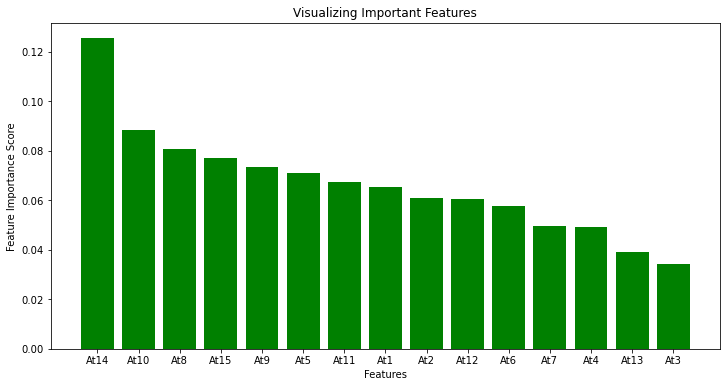

In [12]:
# Creating a bar plot
plt.figure(figsize=(12,6))
plt.bar(feature_imp.index, feature_imp, color="g")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

## KNeighbors

In [13]:
list_k = []
list_acc = []
for K_value in range(2,int((y_train.shape[0]**0.5)/2)):
#for K_value in range(2,10):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print("k = ", K_value,": Accuracy is ", accuracy_score(y_test, y_pred))

k =  2 : Accuracy is  0.9523289665211062
k =  3 : Accuracy is  0.9577874818049491
k =  4 : Accuracy is  0.9570596797671034
k =  5 : Accuracy is  0.9577874818049491
k =  6 : Accuracy is  0.9596069868995634
k =  7 : Accuracy is  0.960334788937409
k =  8 : Accuracy is  0.9570596797671034
k =  9 : Accuracy is  0.9577874818049491
k =  10 : Accuracy is  0.9581513828238719
k =  11 : Accuracy is  0.9577874818049491
k =  12 : Accuracy is  0.9566957787481805
k =  13 : Accuracy is  0.9563318777292577
k =  14 : Accuracy is  0.9548762736535662
k =  15 : Accuracy is  0.9559679767103348
k =  16 : Accuracy is  0.9556040756914119
k =  17 : Accuracy is  0.9530567685589519
k =  18 : Accuracy is  0.9512372634643377
k =  19 : Accuracy is  0.9497816593886463
k =  20 : Accuracy is  0.9508733624454149
k =  21 : Accuracy is  0.9486899563318777
k =  22 : Accuracy is  0.9494177583697234
k =  23 : Accuracy is  0.9479621542940321
k =  24 : Accuracy is  0.9468704512372634
k =  25 : Accuracy is  0.9472343522561864
k

### k=6 cho độ chính xác cao nhất

In [14]:
KN_model = KNeighborsClassifier(n_neighbors=6)
KN_model = create_model(KN_model, X_train, X_test, y_train, y_test, 'KNeighbors')

Accuracy: 95.96069868995633 %
The Training prediction accuracy is:  96.73702086365842 %
The Testing prediction accuracy is:  95.96069868995633 %

 Confusion Matrix 
 [[278   0   0   0   3   0   3   0   1   0]
 [  0 283  13   2   0   1   2   2   0   1]
 [  0   7 276   2   0   0   0   3   0   0]
 [  0   2   0 258   0   2   0   1   0   1]
 [  1   0   1   0 286   0   1   0   0   0]
 [  0   1   0   6   0 263   0   0   2   2]
 [  1   0   1   0   0   0 257   0   0   0]
 [  0   9   5   2   1   0   0 265   1   0]
 [  5   3   3   1   1   0   0   3 236   1]
 [  0   2   0   4   3   3   0   0   2 235]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       285
           1       0.92      0.93      0.93       304
           2       0.92      0.96      0.94       288
           3       0.94      0.98      0.96       264
           4       0.97      0.99      0.98       289
           5       0.98      0.96      0.97       274
           6       0.98 

## SVC

In [15]:
svc_model = SVC(kernel='linear')
svc_model = create_model(svc_model, X_train, X_test, y_train, y_test, 'SVC')

Accuracy: 89.51965065502183 %
The Training prediction accuracy is:  90.24745269286754 %
The Testing prediction accuracy is:  89.51965065502183 %

 Confusion Matrix 
 [[267   0   0   0   5   1   2   0  10   0]
 [  0 257  16   4   0   7   1  10   4   5]
 [  0  15 262   1   0   1   0   7   2   0]
 [  0   7   0 246   0   5   0   2   2   2]
 [  7   3   0   1 267   2   3   0   2   4]
 [  4  13   0   5   2 227   2   1  15   5]
 [  2   1   0   0   1   0 253   0   2   0]
 [  0  18   3   4   1   4   1 246   3   3]
 [  6  14   1   1   1   6   1   9 213   1]
 [  1   7   0   4   7   6   0   0   2 222]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       285
           1       0.77      0.85      0.80       304
           2       0.93      0.91      0.92       288
           3       0.92      0.93      0.93       264
           4       0.94      0.92      0.93       289
           5       0.88      0.83      0.85       274
           6       0.96 

## Logistic Regression

In [16]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model = create_model(logistic_model, X_train, X_test, y_train, y_test, 'Logistic Regression')

Accuracy: 83.11499272197962 %
The Training prediction accuracy is:  82.27802037845706 %
The Testing prediction accuracy is:  83.11499272197962 %

 Confusion Matrix 
 [[254   3   0   0   8   3   6   0  11   0]
 [  0 225  37   5   3  16   2   7   3   6]
 [  0  13 256   3   2   0   0   8   6   0]
 [  0   7   0 243   4   0   0   3   4   3]
 [  4   0   0   1 267   5   2   1   1   8]
 [  1   5   2  19   1 161   9  12  21  43]
 [  1   0   0   0   0   2 250   0   6   0]
 [  0  19   3   9   4   8   1 230   6   3]
 [ 11  10   4   7   0  12   1  10 195   3]
 [  0   7   2  10  10  16   0   0   1 203]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       285
           1       0.78      0.74      0.76       304
           2       0.84      0.89      0.86       288
           3       0.82      0.92      0.87       264
           4       0.89      0.92      0.91       289
           5       0.72      0.59      0.65       274
           6       0.92 

## MultinomialNB

In [17]:
nb = MultinomialNB()
nb = create_model(nb, X_train, X_test, y_train, y_test, 'MultinomialNB')

Accuracy: 77.2197962154294 %
The Training prediction accuracy is:  75.80058224163028 %
The Testing prediction accuracy is:  77.2197962154294 %

 Confusion Matrix 
 [[254   1   1   0  10   0  15   0   3   1]
 [  0 187  69  11   1   5   1  12   1  17]
 [  0   8 259   2   0   3   0  14   2   0]
 [  0  20   0 239   0   1   0   1   0   3]
 [  3   3   0   0 263   5   7   0   1   7]
 [  0   0   0  49   0 138   3   7  26  51]
 [  1   0   1   1   2   1 249   0   2   2]
 [  0  36   7  10   4   8   1 213   4   0]
 [ 25   5   5  13   9  10   3  12 168   3]
 [  0  19   0  34  28  15   0   1   0 152]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       285
           1       0.67      0.62      0.64       304
           2       0.76      0.90      0.82       288
           3       0.67      0.91      0.77       264
           4       0.83      0.91      0.87       289
           5       0.74      0.50      0.60       274
           6       0.89   

## GaussianNB

In [18]:
gaussianNB = GaussianNB()
gaussianNB = create_model(gaussianNB, X_train, X_test, y_train, y_test, 'GaussianNB')

Accuracy: 79.9490538573508 %
The Training prediction accuracy is:  79.26977195536148 %
The Testing prediction accuracy is:  79.9490538573508 %

 Confusion Matrix 
 [[254   0   0   0   2   0   5   0  24   0]
 [  0 205  66   4   0  15   1   3   2   8]
 [  0  17 238   0   0  19   0  10   4   0]
 [  0  15   0 235   0   1   0   1   1  11]
 [  5   2   0   0 262   2   4   0   9   5]
 [  0   7   0  30   0 154   3   0  19  61]
 [  2   0   0   0   1   4 238   0  14   0]
 [  0  33  19   0   0   5   0 212   6   8]
 [ 13  23   2   0   0   9   1  11 193   1]
 [  2  13   0  13   8   6   0   0   1 206]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       285
           1       0.65      0.67      0.66       304
           2       0.73      0.83      0.78       288
           3       0.83      0.89      0.86       264
           4       0.96      0.91      0.93       289
           5       0.72      0.56      0.63       274
           6       0.94   

In [19]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
cv_df.sort_values('accuracy', ascending=False)

,model_name,accuracy
1,Random Forest,0.970888
2,KNeighbors,0.957787
3,SVC,0.892649
0,Decision Tree,0.889283
4,Logistic Regression,0.822506
6,GaussianNB,0.794122
5,MultinomialNB,0.758278


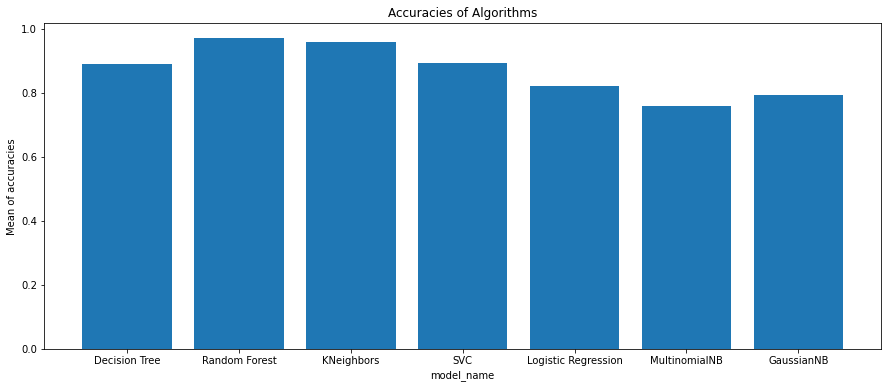

In [20]:
plt.figure(figsize=(15,6))
plt.bar(cv_df['model_name'],cv_df['accuracy'], )
plt.xlabel('model_name')
plt.ylabel('Mean of accuracies')
plt.title("Accuracies of Algorithms")
plt.show()

### Kết luận
* Random forest cho kết quả tốt nhất

# Giảm chiều bằng PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
def pca_random_forest(n):
    for i in range(2, n+1):
        # Create pca
        pca = PCA(n_components=i)
        principalComponents = pca.fit_transform(X)
        # Crete columns by length
        cols = ['PC'+str(id) for id in range(1, i+1) ]
        principalDf = pd.DataFrame(data=principalComponents, columns=cols)
        # Train test split
        X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf, y, random_state=42)
        # Create model
        RF_model = RandomForestClassifier(n_estimators=100)
        model = RF_model.fit(X_train_pca, y_train_pca)
        # Predict
        y_pred = model.predict(X_test_pca)
        print(i, "components have accuracy:", accuracy_score(y_test_pca, y_pred)*100,"%")

In [23]:
pca_random_forest(15)

2 components have accuracy: 57.132459970887915 %
3 components have accuracy: 77.72925764192141 %
4 components have accuracy: 84.75254730713246 %
5 components have accuracy: 87.91848617176127 %
6 components have accuracy: 90.46579330422125 %
7 components have accuracy: 91.44832605531296 %
8 components have accuracy: 92.39446870451238 %
9 components have accuracy: 92.8311499272198 %
10 components have accuracy: 94.14119359534206 %
11 components have accuracy: 94.21397379912663 %
12 components have accuracy: 93.95924308588064 %
13 components have accuracy: 94.54148471615721 %
14 components have accuracy: 94.39592430858806 %
15 components have accuracy: 94.90538573508006 %


## Nhận xét
* PCA tốt nhất với là có n_components = 11
* Không cải thiện so với không dùng PCA